In [819]:
import datetime
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Downloading database

In [820]:
df = pd.read_csv('googleplaystore.csv')

# Updating values

## Wrongly inputted data

In [821]:
df.loc[df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The data have been shifthed to their correct position. The missing one, Cateory and Genres, have been taken by looking from the Google Plays Store

In [822]:
df.loc[df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame', ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']] = np.NaN, 1.9, '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', np.NaN, 'February 11, 2018', '1.0.19', '4.0 and up'
df.loc[df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame', ['Category', 'Genres']] = 'LIFESTYLE', 'Lifestyle'

In [823]:
df.loc[df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up


## Last update

In [824]:
df['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10841, dtype: object

In [825]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [826]:
df.sort_values(by=['Last Updated'], inplace=True)

In [827]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7479,FML F*ck my life + widget,FAMILY,4.2,1415,209k,"100,000+",Free,0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up
7430,CJ Poker Odds Calculator,GAME,4.1,207,116k,"50,000+",Free,0,Everyone,Card,2011-01-30,1.2,1.6 and up
10282,FD Shift Calendar Widget,TOOLS,4.1,981,73k,"100,000+",Free,0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,"5,000,000+",Free,0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up
8084,Freecell CY,GAME,4.0,387,1.1M,"50,000+",Free,0,Everyone,Card,2011-04-16,1.3.3,1.6 and up
9067,Dx Ludo,FAMILY,3.6,215,2.6M,"50,000+",Free,0,Everyone,Puzzle,2011-04-18,1.0,2.1 and up
5144,AH Alarm Panel,TOOLS,3.9,7,81k,100+,Paid,$4.99,Everyone,Tools,2011-05-12,1.2.0,1.5 and up
7237,CF-Bench Pro,TOOLS,4.6,159,29k,"1,000+",Paid,$1.49,Everyone,Tools,2011-06-23,1.1,1.6 and up
10460,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26k,"5,000+",Paid,$1.00,Everyone,Tools,2011-06-26,1.0.0,2.1 and up
1544,Apk Installer,LIBRARIES_AND_DEMO,3.8,7750,292k,"1,000,000+",Free,0,Everyone,Libraries & Demo,2011-06-29,1.0,1.6 and up


# Removing duplicates

In [828]:
df.shape

(10841, 13)

In [829]:
df.drop_duplicates(
    subset=['App', 'Rating', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver',
       'Android Ver'], # Ignoring 'Reviews', 'Category', and 'Last Updated'
    keep='last', # The last entry is also the most recent one 
    inplace=True)

In [830]:
df.sort_index(inplace=True)

# Getting preliminary information

In [831]:
df.shape

(9689, 13)

In [832]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


In [833]:
df.describe()

,Rating
count,8225.000000
mean,4.173313
std,0.536582
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [834]:
categorical = df.dtypes[df.dtypes == 'object'].index
df[categorical].describe()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
count,9689,9689,9689,9689,9689,9688,9689,9689,9689,9681,9687
unique,9660,33,5354,461,21,2,92,6,119,2831,33
top,Bubble Shooter,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,Varies with device,4.1 and up
freq,3,1880,593,1232,1422,8932,8933,7931,829,1058,2211


In [835]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [836]:
df.isna().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# Column analysis

## App

In [837]:
df['App'].isna().sum()

0

In [838]:
df['App'].value_counts()

Bubble Shooter                                   3
Solitaire                                        3
Call Blocker                                     2
Chrome Beta                                      2
Period Tracker                                   2
                                                ..
Cook Baked Lasagna                               1
Tom's Love Letters                               1
The J-Notes: Jazz News                           1
Mali J                                           1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

#### App's names that appear multiple times seam to be different apps with the same generic name

In [839]:
df.loc[df['App'] == 'Solitaire']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,2018-08-01,2.137.0,4.1 and up
1973,Solitaire,GAME,4.7,154264,12M,"10,000,000+",Free,0,Everyone,Card,2018-06-08,Varies with device,Varies with device
2024,Solitaire,FAMILY,4.4,685,26M,"100,000+",Free,0,Everyone,Card;Brain Games,2018-07-16,1.7.101,4.1 and up


In [840]:
df.loc[df['App'] == 'Bubble Shooter']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
2041,Bubble Shooter,FAMILY,4.4,59843,20M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,2018-01-09,2.3.3122,2.3 and up
3894,Bubble Shooter,GAME,4.5,43576,50M,"5,000,000+",Free,0,Everyone,Arcade,2017-09-13,4.4,2.3 and up


## Category

#### Transforming Category feature into a Categorical dtype

In [841]:
df['Category'] = pd.Categorical(df['Category'])

<Axes: >

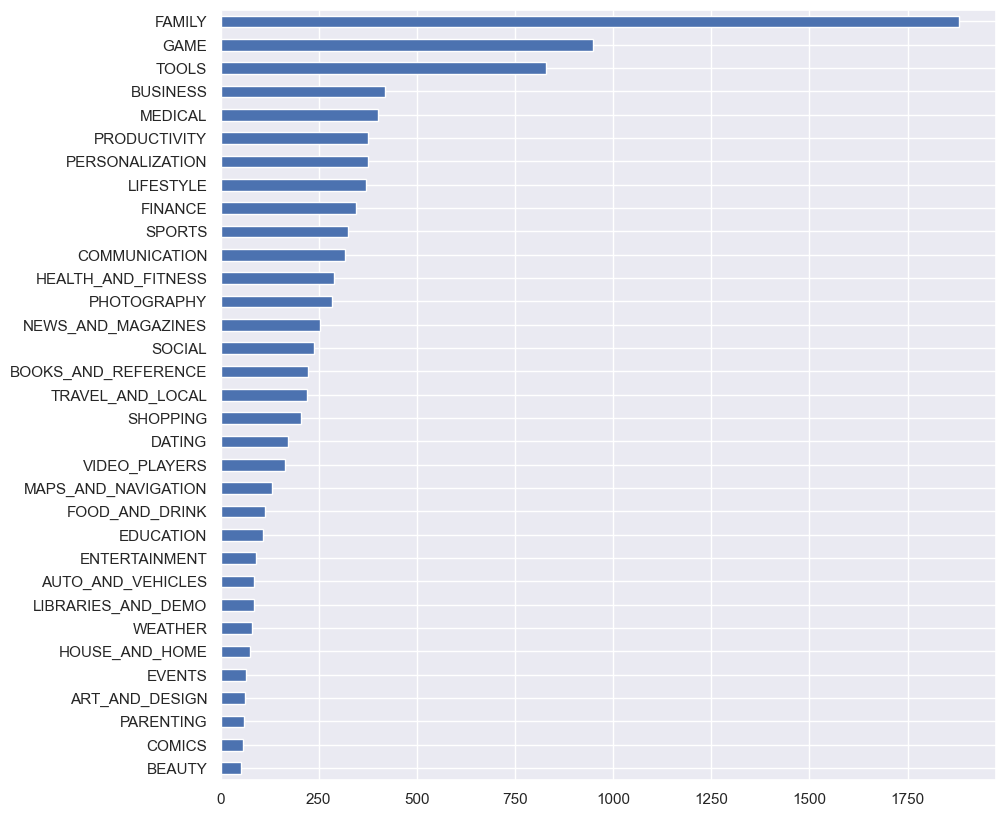

In [842]:
df['Category'].value_counts()[::-1].plot(kind='barh', figsize=(10, 10))

## Reviews

#### Converting reviews column into integer

In [843]:
df['Reviews'].isna().sum()

0

In [844]:
df['Reviews'] = df['Reviews'].astype('Int32')

## Size

#### Checking how size is expressed

In [845]:
def convert_size_to_bytes(item):
    if item.isdigit():
        return int(item)
    elif item[-1] == 'k':
        return int(float(item[:-1]) * 1_024) 
    elif item[-1] == 'M':
        return int(float(item[:-1]) * 1_024 * 1_024) 
    else:
        return item
    
    
df['Size'] = df['Size'].apply(convert_size_to_bytes)

In [846]:
df.loc[df['Size'] == 'Varies with device'].shape

(1232, 13)

In [847]:
def estimate_size(df):
    categories_mean_size = {}

    for category in df['Category'].unique():
        category_mean = df.loc[(df['Category'] == category) & (df['Size'] != 'Varies with device'), 'Size'].mean()
        categories_mean_size[category] = math.floor(category_mean)

    for category in df['Category'].unique():
        df.loc[(df['Category'] == category) & (df['Size'] == 'Varies with device'), 'Size'] = categories_mean_size[category]
        
estimate_size(df)

In [848]:
df['Size'] = df['Size'].astype('Int32')

## Rating

#### Checking if there are NaN

In [849]:
df['Rating'].isna().sum()

1464

#### Checking information about apps with no rating value

In [850]:
df.loc[df['Rating'].isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7340032,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5976883,"100,000+",Free,0,Everyone 10+,Beauty,2017-09-20,8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3879731,"50,000+",Free,0,Everyone,Beauty,2018-07-23,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7759462,"100,000+",Free,0,Teen,Beauty,2018-07-17,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,3040870,"10,000+",Free,0,Mature 17+,Beauty,2017-08-08,2.0,2.3 and up


In [851]:
df.loc[df['Rating'].isna()].describe()

,Rating,Reviews,Size
count,0.0,1464.0,1464.0
mean,NaN,18.121585,-175944.891393
std,NaN,140.37926,15445991.384836
min,NaN,0.0,18432.0
25%,NaN,0.0,3879731.0
50%,NaN,1.0,9646899.0
75%,NaN,5.0,19922944.0
max,NaN,3248.0,103809024.0


Probably most of the app with no rating value have so litte reviews than google play store can't compute a rating value

In [852]:
df['Rating'] = df['Rating'].fillna(0)

## Installs

#### Checking unique value  in the installs column

In [853]:
sorted(list({item.replace(',', '_') for item in df['Installs']}), key=lambda num: 0 if num == '0' else int(num[:-1])) 

['0+',
 '0',
 '1+',
 '5+',
 '10+',
 '50+',
 '100+',
 '500+',
 '1_000+',
 '5_000+',
 '10_000+',
 '50_000+',
 '100_000+',
 '500_000+',
 '1_000_000+',
 '5_000_000+',
 '10_000_000+',
 '50_000_000+',
 '100_000_000+',
 '500_000_000+',
 '1_000_000_000+']

#### Looking fot the meaning of 0+ as number of download

In [854]:
df.loc[df['Installs'] == '0+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,0.0,0,5767168,0+,Paid,$1.49,Everyone,Personalization,2018-07-11,1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,0.0,0,9122611,0+,Paid,$13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,0.0,0,7759462,0+,Paid,$1.99,Everyone,Education,2017-07-30,1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,0.0,0,34603008,0+,Paid,$2.99,Everyone,Education,2016-04-15,1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,0.0,0,5662310,0+,Paid,$154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up
7434,Pekalongan CJ,SOCIAL,0.0,0,6186598,0+,Free,0,Teen,Social,2018-07-21,0.0.1,4.4 and up
8081,CX Network,BUSINESS,0.0,0,10485760,0+,Free,0,Everyone,Business,2018-08-06,1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,0.0,0,2202009,0+,Free,0,Everyone,News & Magazines,2018-07-07,1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,0.0,0,1258291,0+,Free,0,Everyone,Art & Design,2017-03-14,4.0,4.2 and up
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,0.0,0,58720256,0+,Paid,$3.99,Everyone,Travel & Local,2017-01-22,1.1.1,4.1 and up


#### '0+' is probably a wrongly typed value and can be replaced with '0'

In [855]:
df.loc[df['Installs'] == '0+', ['Installs']] = '0'

In [856]:
df.loc[df['Installs'] == 'Popsicle Launcher for Android P 9.0 launcher']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Converting to integer to allow the Categorical variable to be in the correct order

In [857]:
df['Installs'] = df['Installs'].str.replace(",","")
df['Installs'] = df['Installs'].str.replace("+","")
df['Installs'] = df['Installs'].astype('Int32')
df['Installs']

C:\Users\paolo\AppData\Local\Temp\ipykernel_14996\2496146396.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace("+","")


0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9689, dtype: Int32

# Price

In [858]:
df['Price'].isna().sum()

0

#### Converting price into float

In [859]:
def convert_price_into_float(item):
    if isinstance(item, float):
        return item
    elif isinstance(item, int):
        return float(item)
    elif item == '0':
        return 0.0
    else:
        return float(item[1:])

df['Price'] = df['Price'].apply(convert_price_into_float)

## Type

#### Checking what values Type can have

In [860]:
df['Type'].value_counts()

Free    8932
Paid     756
Name: Type, dtype: int64

#### Checking if there are NaN

In [861]:
df['Type'].isna().sum()

1

In [862]:
df.loc[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,0.0,0,28612316,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [863]:
def fill_missing_type(df):
    df.loc[(df['Type'].isna()) & (df['Price'] == 0), 'Type'] = 'Free' 
    df.loc[(df['Type'].isna()) & (df['Price'] != 0), 'Type'] = 'Paid'

fill_missing_type(df)

In [864]:
df.loc[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Converting type into Categorical

In [865]:
df['Type'] = pd.Categorical(df['Type'])

In [866]:
df['Type'].value_counts()

Free    8933
Paid     756
Name: Type, dtype: int64

<Axes: >

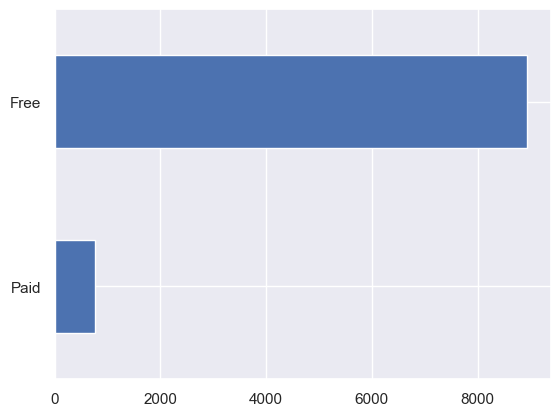

In [867]:
df['Type'].value_counts()[::-1].plot(kind='barh')

## Content rating

#### Checking which value content rating can have

In [868]:
df['Content Rating'].value_counts()

Everyone           7931
Teen               1037
Mature 17+          394
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [869]:
df['Content Rating'].isna().sum()

0

#### Checking which apps are Unrated

In [870]:
df.loc[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,0.0,1,2621440,500,Free,0.0,Unrated,Entertainment,2015-06-24,5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6710886,50000,Free,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up


#### Manualy inserting Content Rating based on an evaluetion of the app 

In [871]:
df.loc[df['App'] == 'Best CG Photography', 'Content Rating'] = 'Everyone'
df.loc[df['App'] == 'DC Universe Online Map', 'Content Rating'] = 'Everyone'

In [872]:
df['Content Rating'] = pd.Categorical(df['Content Rating'])

In [873]:
df['Content Rating'].value_counts()

Everyone           7933
Teen               1037
Mature 17+          394
Everyone 10+        322
Adults only 18+       3
Name: Content Rating, dtype: int64

<Axes: >

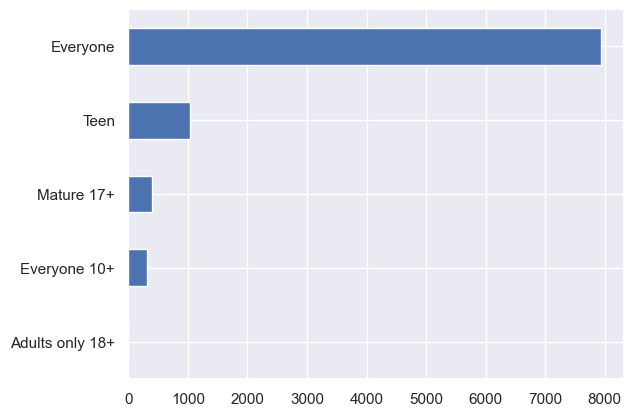

In [874]:
df['Content Rating'].value_counts()[::-1].plot(kind='barh')

# Genres

In [875]:
df['Genres'].value_counts()

Tools                                 829
Entertainment                         561
Education                             512
Business                              420
Medical                               400
                                     ... 
Travel & Local;Action & Adventure       1
Music & Audio;Music & Video             1
Video Players & Editors;Creativity      1
Health & Fitness;Education              1
Strategy;Creativity                     1
Name: Genres, Length: 119, dtype: int64

<Axes: >

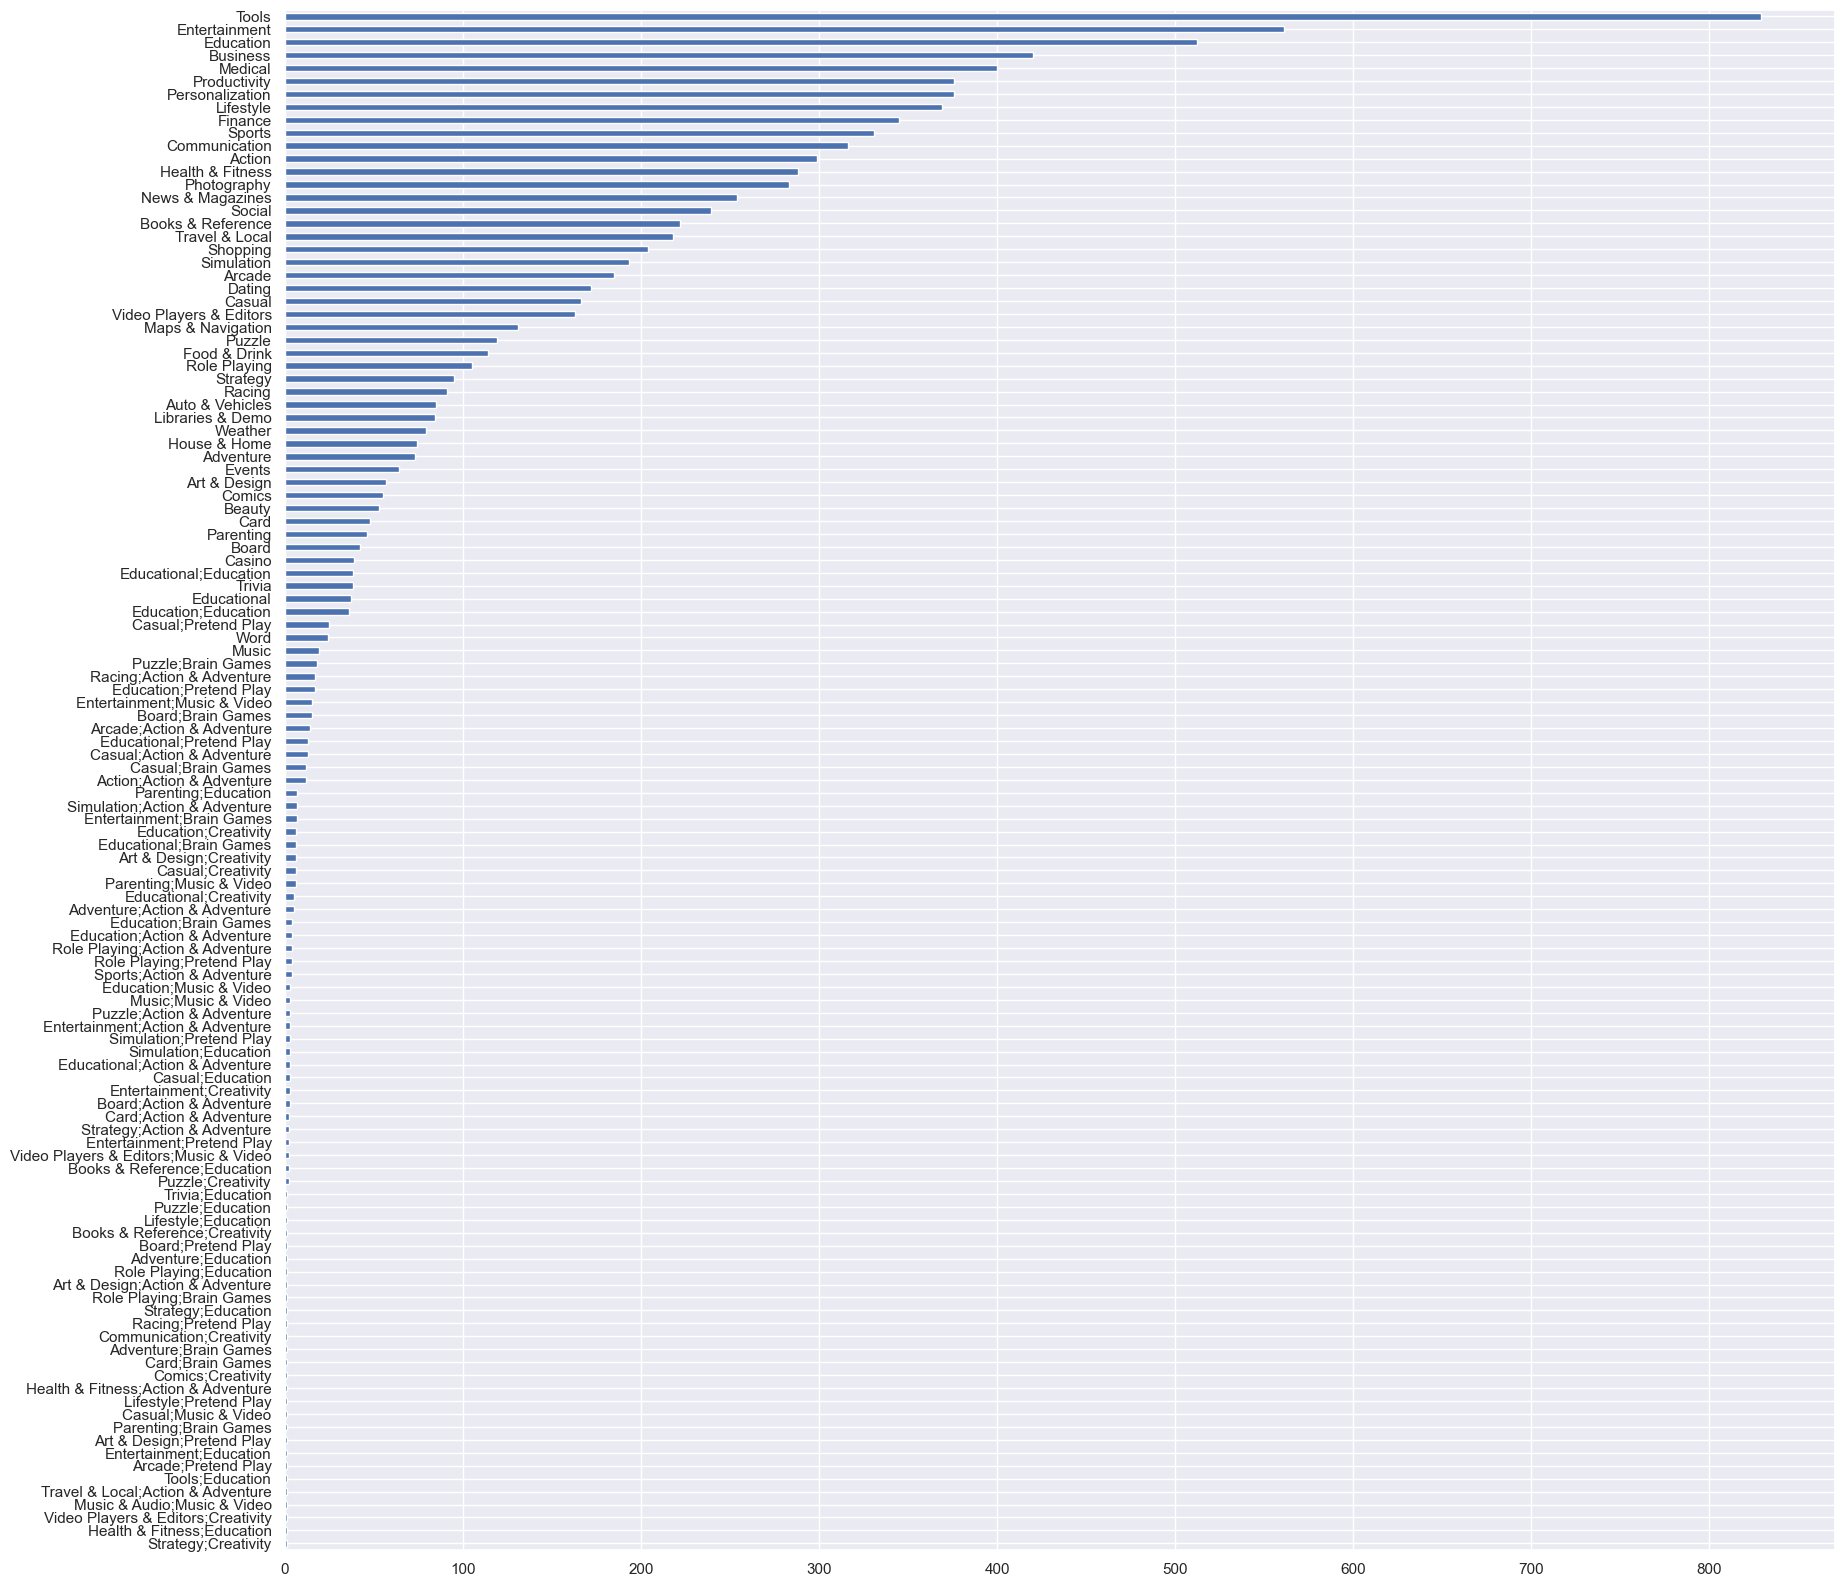

In [876]:
df['Genres'].value_counts()[::-1].plot(kind='barh', figsize=(20,20))

In [877]:
df['Genres'] = df['Genres'].str.split(';', expand=True)[0]

<Axes: >

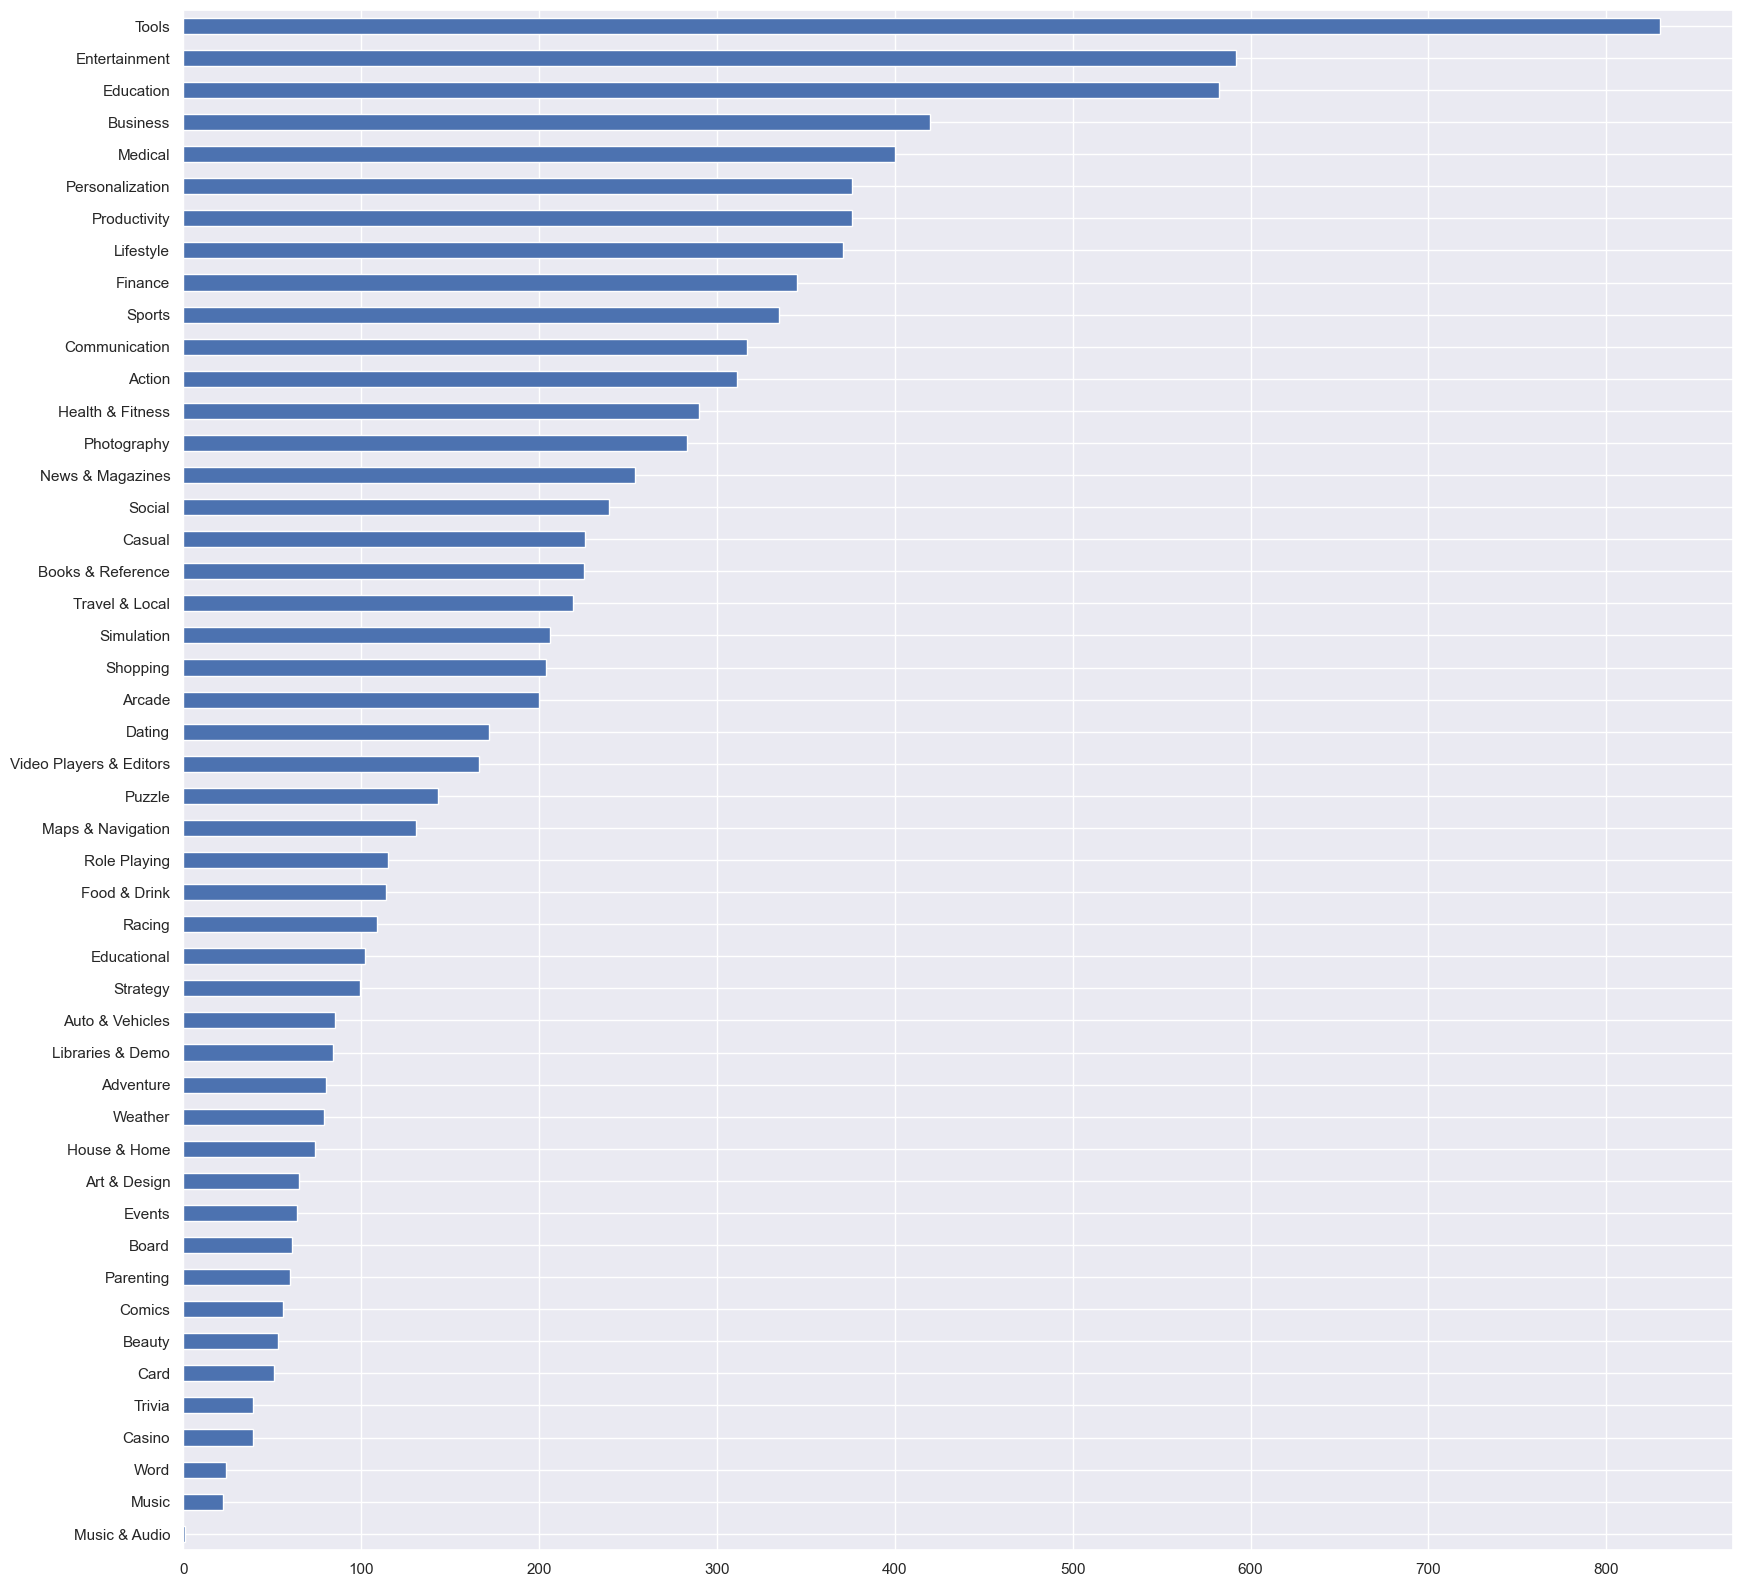

In [878]:
df['Genres'].value_counts()[::-1].plot(kind='barh', figsize=(20,20))

In [879]:
df['Genres'] = pd.Categorical(df['Genres'])

In [880]:
df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)

## Getting summary of info after dataype conversion

In [881]:
df.dtypes

App                       object
Category                category
Rating                   float64
Reviews                    Int32
Size                       Int32
Installs                   Int32
Type                    category
Price                    float64
Content Rating          category
Genres                  category
Last Updated      datetime64[ns]
dtype: object

In [882]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9689.000000,9689.0,9689.0,9689.0,9689.000000
mean,3.542729,217164.964289,-153514.186087,-177630.488286,1.095895
std,1.574367,1829819.51169,21601103.448923,53697162.289389,16.826150
min,0.000000,0.0,8704.0,0.0,0.000000
25%,3.600000,25.0,5557452.0,1000.0,0.000000
50%,4.200000,979.0,13772056.0,100000.0,0.000000
75%,4.500000,29551.0,28311552.0,1000000.0,0.000000
max,5.000000,78128208.0,104857600.0,1000000000.0,400.000000


In [883]:
categorical = df.dtypes[df.dtypes == 'object'].index

In [884]:
df[categorical].describe()

,App
count,9689
unique,9660
top,Bubble Shooter
freq,3


# Plotting

In [885]:
top_app = df.nlargest(5, 'Reviews')
top_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
3943,Facebook,SOCIAL,4.1,78128208,16760299,1000000000,Free,0.0,Teen,Social,2018-08-03
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,11849884,1000000000,Free,0.0,Everyone,Communication,2018-08-03
2604,Instagram,SOCIAL,4.5,66577446,16760299,1000000000,Free,0.0,Teen,Social,2018-07-31
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11849884,1000000000,Free,0.0,Everyone,Communication,2018-08-01
1879,Clash of Clans,GAME,4.6,44893888,102760448,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15


<Axes: xlabel='Reviews', ylabel='Rating'>

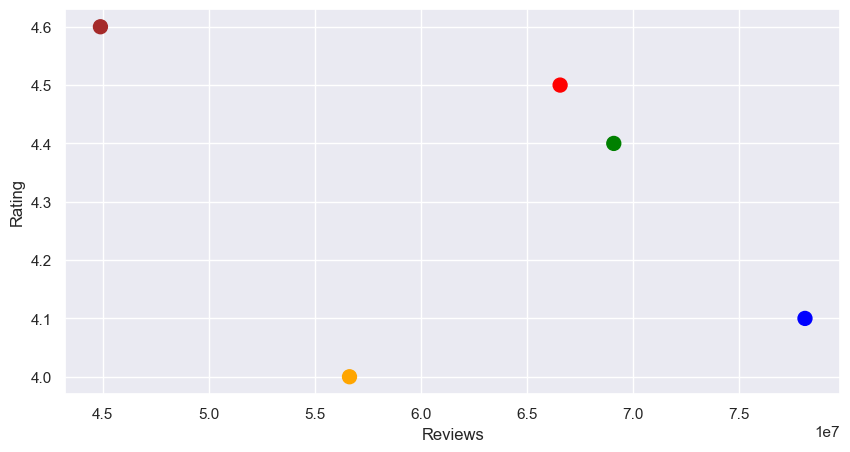

In [886]:
colors = {'Facebook': 'blue', 
          'WhatsApp Messenger': 'green',
          'Instagram': 'red',
          'Messenger – Text and Video Chat for Free': 'orange',
          'Clash of Clans': 'brown'}

top_app.plot.scatter(x='Reviews', y='Rating', c=top_app['App'].map(colors), s=100, figsize=(10,5))

<Axes: xlabel='Size', ylabel='Rating'>

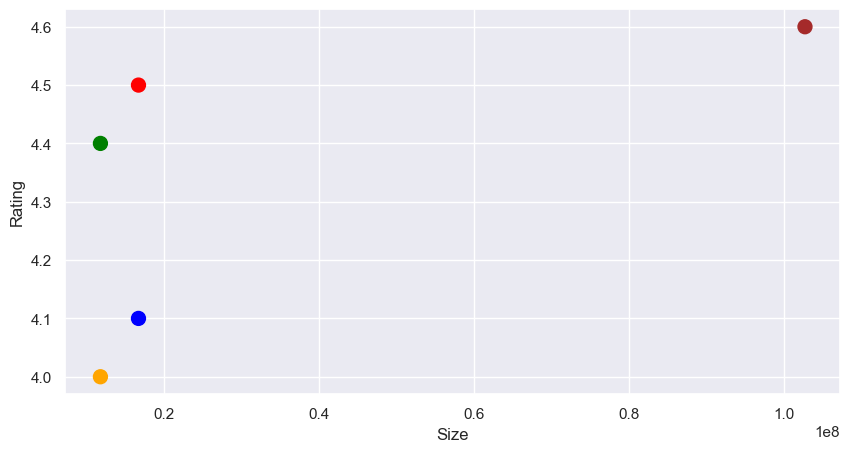

In [887]:
colors = {'Facebook': 'blue', 
          'WhatsApp Messenger': 'green',
          'Instagram': 'red',
          'Messenger – Text and Video Chat for Free': 'orange',
          'Clash of Clans': 'brown'}

top_app.plot.scatter(x='Size', y='Rating', c=top_app['App'].map(colors), s=100, figsize=(10,5))

<Axes: xlabel='Size', ylabel='Reviews'>

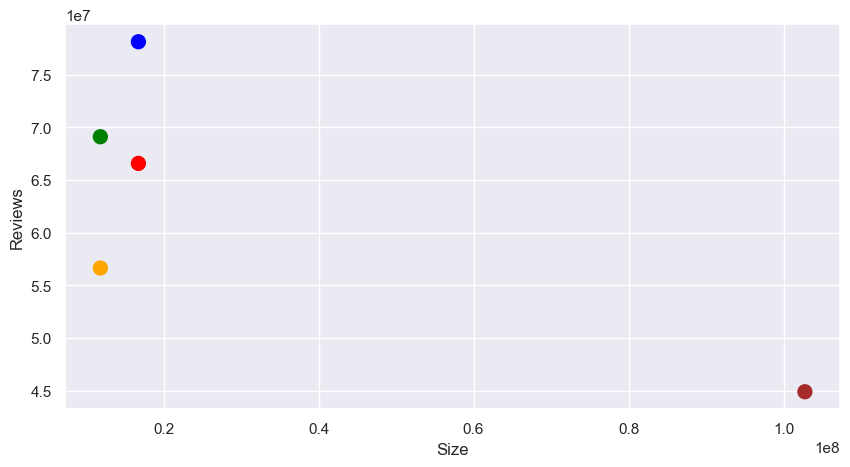

In [888]:
colors = {'Facebook': 'blue', 
          'WhatsApp Messenger': 'green',
          'Instagram': 'red',
          'Messenger – Text and Video Chat for Free': 'orange',
          'Clash of Clans': 'brown'}

top_app.plot.scatter(x='Size', y='Reviews', c=top_app['App'].map(colors), s=100, figsize=(10,5))

# Esercizi

### Print(table) the unique names of all categories

In [889]:
df['Category'].unique()

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', ..., 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
Length: 33
Categories (33, object): ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', ..., 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']

In [890]:
df.apply(pd.unique, axis=0)

App               [Photo Editor & Candy Camera & Grid & ScrapBoo...
Category          ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUT...
Rating            [4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, ...
Reviews           [159, 87510, 215644, 967, 167, 178, 36815, 137...
Size              [19922944, 9122611, 26214400, 2936012, 5872025...
Installs          [10000, 5000000, 50000000, 100000, 50000, 1000...
Type              ['Free', 'Paid']
Categories (2, object): ['Fre...
Price             [0.0, 4.99, 3.99, 6.99, 1.49, 2.99, 7.99, 3.49...
Content Rating    ['Everyone', 'Teen', 'Everyone 10+', 'Mature 1...
Genres            ['Art & Design', 'Auto & Vehicles', 'Beauty', ...
Last Updated      [2018-01-07T00:00:00.000000000, 2018-08-01T00:...
dtype: object

### Plot a bar chart for categories with the total number of installing numbers in each category 

In [891]:
installs_by_category = df.groupby(by='Category')['Installs'].agg('sum')

<Axes: ylabel='Category'>

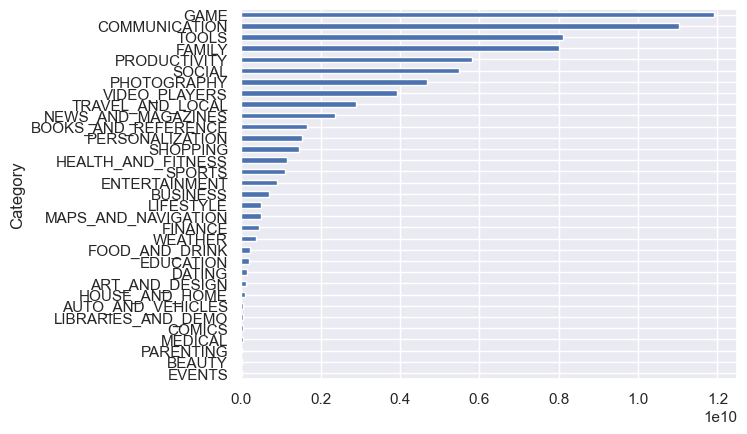

In [892]:
installs_by_category.sort_values().plot.barh(y='Category', x='Installs')

In [893]:
data = df[['Category','Installs']].groupby(by='Category').agg('sum').reset_index()

[Text(0.5, 1.0, 'Installs by category'),
 (0.0, 12498070635.75),
 Text(0.5, 0, 'Installs'),
 Text(0, 0.5, 'Category')]

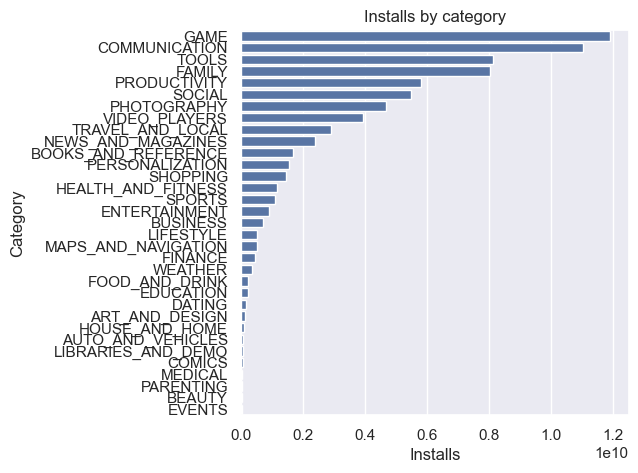

In [894]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=data,
            y="Category",
            x="Installs",
            order=data.sort_values(by='Installs', ascending=False).Category,
            color="b")
ax.set(title = "Installs by category",
    xlim=  0,
    xlabel = "Installs",
    ylabel= "Category")

### plot a bar chart for the total prices of each paid app in each category ( the sum of all prices in the same category)

In [895]:
price_by_category = df.groupby(by='Category')['Price'].agg('sum')

<Axes: ylabel='Category'>

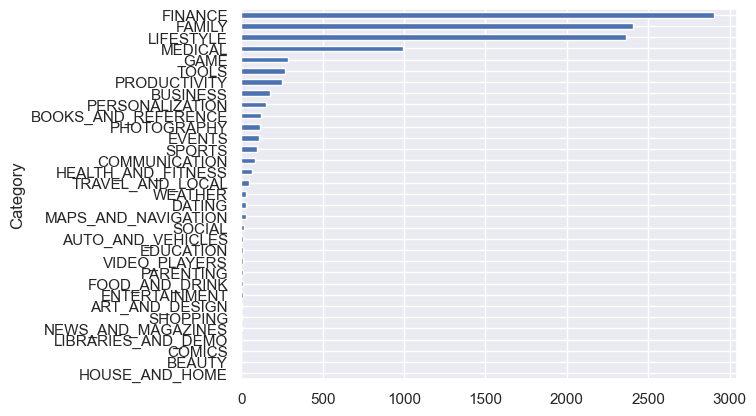

In [896]:
price_by_category.sort_values().plot.barh(y='Category', x='Installs')

### plot a bar chart of the total revenue of each category by multiplying the price by the number of installs

In [897]:
paid_apps = df[df['Type'] == 'Paid']
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,7130316,100000,Paid,4.99,Everyone,Business,2018-03-25
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,40894464,100000,Paid,4.99,Everyone,Business,2017-04-11
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,11849884,100000,Paid,3.99,Everyone,Communication,2018-07-05
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,16421871,10000,Paid,3.99,Mature 17+,Dating,2018-06-19
477,Calculator,DATING,2.6,57,6501171,1000,Paid,6.99,Everyone,Dating,2017-10-25
...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,0.0,17,160768,100,Paid,0.99,Mature 17+,Entertainment,2015-11-25
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2516582,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08
10782,Trine 2: Complete Story,GAME,3.8,252,11534336,10000,Paid,16.99,Teen,Action,2015-02-27
10785,"sugar, sugar",FAMILY,4.2,1405,9961472,10000,Paid,1.20,Everyone,Puzzle,2018-06-05


In [898]:
paid_apps_total_install = paid_apps.groupby(by='Category')['Installs'].agg('sum')

In [899]:
paid_apps_avg_price = paid_apps.groupby(by='Category')['Price'].agg('mean').fillna(0).round(2)

In [900]:
paid_apps_total_revenue = paid_apps_total_install * paid_apps_avg_price

<Axes: ylabel='Category'>

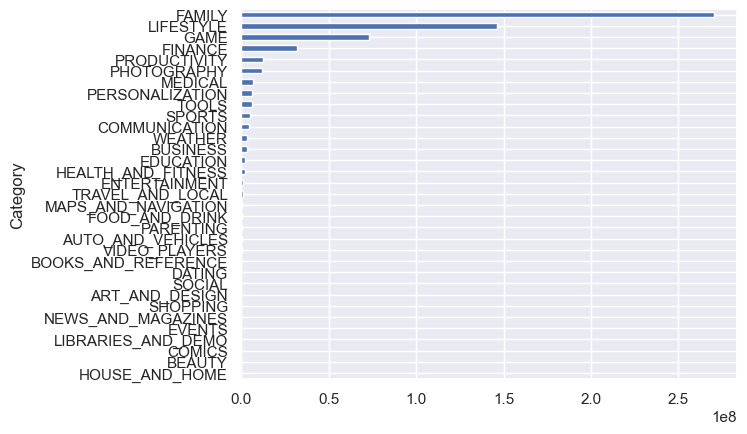

In [901]:
paid_apps_total_revenue.sort_values().plot.barh(y='Category', x='Installs')

#### print a table and a plot chart for top 5 download apps with smallest size and highest downloading number

In [902]:
df.Size.min()

8704

In [903]:
df.loc[df['Size'] == df['Size'].min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
1532,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,8704,50000,Free,0.0,Everyone,Libraries & Demo,2017-09-27


In [904]:
smallest = df.nsmallest(5, 'Size').sort_values('Installs')
smallest

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
4983,My baby firework (Remove ad),FAMILY,4.1,30,14336,1000,Paid,0.99,Everyone,Entertainment,2013-04-25
4977,Ad Remove Plugin for App2SD,PRODUCTIVITY,4.1,66,17408,1000,Paid,1.29,Everyone,Productivity,2013-09-25
1532,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,8704,50000,Free,0.00,Everyone,Libraries & Demo,2017-09-27
10072,ExDialer PRO Key,COMMUNICATION,4.5,5474,17408,100000,Paid,3.99,Everyone,Communication,2014-01-15
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11264,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12


<Axes: ylabel='App'>

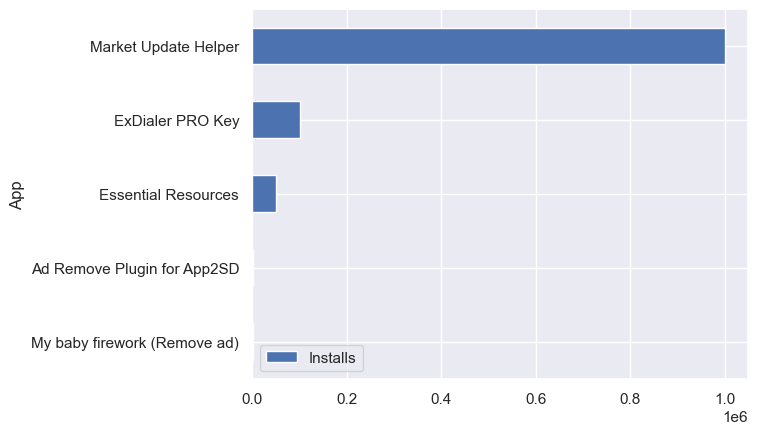

In [905]:
smallest.plot.barh(x='App', y='Installs')

print a table and a plot chart for top 5 download apps in each category free and paid (if there is paid)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
8074,Absolute RC Heli Simulator,SPORTS,3.9,654,52428800,10000,Paid,4.99,Everyone,Sports,2017-12-20
3039,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,26214400,50000,Paid,29.99,Everyone,Sports,2018-07-11
4700,Mike V: Skateboard Party PRO,SPORTS,4.2,2506,25226801,50000,Paid,3.99,Everyone,Sports,2017-01-23
10645,Football Manager Mobile 2018,SPORTS,3.9,11460,25226801,100000,Paid,8.99,Everyone,Sports,2018-06-27
5490,True Skate,SPORTS,4.4,129409,76546048,1000000,Paid,1.99,Everyone,Sports,2018-08-04


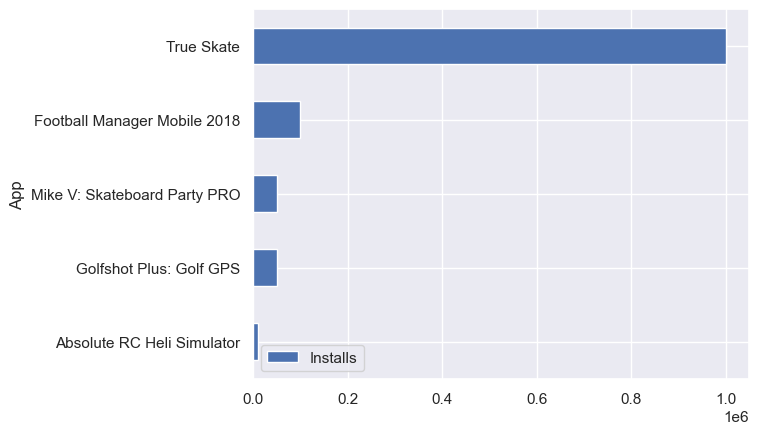

In [906]:
def top_app_by_category(df, category, type):
    data = df.loc[(df['Category'] == category) & (df['Type'] == type)].nlargest(5, ['Installs', 'Rating']).sort_values(['Installs', 'Rating'])
    display(data)
    data.plot.barh(x='App', y='Installs')

top_app_by_category(df, 'SPORTS', 'Paid')

## Analisi individuali sprint 5

In [907]:
import pickle

#### split dataset into 4 parts and pickle them (search for pickle if you don't know what it is)

In [908]:
df.shape

(9689, 11)

In [909]:
np.array_split(df, 4)[0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944,10000,Free,0.0,Everyone,Art & Design,2018-01-07
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012,100000,Free,0.0,Everyone,Art & Design,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5872025,50000,Free,0.0,Everyone,Art & Design,2017-03-26
...,...,...,...,...,...,...,...,...,...,...,...
3287,Brightest Flashlight - LED Light,TOOLS,4.5,876866,9542041,50000000,Free,0.0,Everyone,Tools,2018-07-27
3288,LED Flashlight,TOOLS,4.4,207706,4508876,10000000,Free,0.0,Everyone,Tools,2017-07-10
3289,Tiny Flashlight + LED,TOOLS,4.4,4254879,9196251,100000000,Free,0.0,Everyone,Tools,2018-07-08
3290,Flashlight & LED Torch,TOOLS,4.3,111507,9196251,10000000,Free,0.0,Everyone,Tools,2017-12-29


In [910]:
with open("pickle.dat", "wb") as f:
    
    for df_part in np.array_split(df, 4):
        pickle.dump(df_part, f)

In [911]:
data = []
with open("pickle.dat", "rb") as f:
    for _ in range(4):
        data.append(pickle.load(f))
print(data[1])

                               App             Category  Rating  Reviews  \
3292                    Flashlight                TOOLS     4.7   115409   
3293  CM Flashlight (Compass, SOS)                TOOLS     4.4   166367   
3294             Flashlight HD LED                TOOLS     4.3   618918   
3295  Flashlight - Torch LED Light                TOOLS     4.4   192661   
3296        Super Flashlight + LED                TOOLS     4.3    54207   
...                            ...                  ...     ...      ...   
5899   Oxford A-Z of English Usage  BOOKS_AND_REFERENCE     4.0     5300   
5900                     Cures A-Z   HEALTH_AND_FITNESS     4.0      265   
5901  AZ Practice Test & Questions               FAMILY     4.4       13   
5902                 Arizona Trail     TRAVEL_AND_LOCAL     4.7       65   
5903                Ultrasound A-Z               FAMILY     4.5      112   

          Size  Installs  Type  Price Content Rating             Genres  \
3292   91962

In [912]:
df_part1, df_part2, df_part3, df_part4 = data

In [913]:
df_parts = [df_part2, df_part4, df_part1,  df_part3]
new_df = pd.concat(df_parts)
new_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
3292,Flashlight,TOOLS,4.7,115409,9196251,10000000,Free,0.00,Everyone,Tools,2018-08-06
3293,"CM Flashlight (Compass, SOS)",TOOLS,4.4,166367,1887436,5000000,Free,0.00,Everyone,Tools,2018-05-25
3294,Flashlight HD LED,TOOLS,4.3,618918,9196251,50000000,Free,0.00,Everyone,Tools,2018-07-28
3295,Flashlight - Torch LED Light,TOOLS,4.4,192661,8912896,10000000,Free,0.00,Everyone,Tools,2018-07-07
3296,Super Flashlight + LED,TOOLS,4.3,54207,4613734,5000000,Free,0.00,Everyone,Tools,2017-07-11
...,...,...,...,...,...,...,...,...,...,...,...
8368,Penny Puss,TOOLS,3.0,19,23068672,1000,Paid,4.99,Everyone,Tools,2016-07-09
8369,DG Mobile,GAME,4.3,59,1468006,1000,Free,0.00,Everyone,Board,2017-04-08
8370,Go Go Coupons - Free Coupon and Discount,SHOPPING,3.0,4,1258291,1000,Free,0.00,Everyone,Shopping,2018-07-01
8371,ZombieVital DG,FAMILY,4.3,10,20971520,100,Paid,12.99,Everyone,Simulation,2018-08-04


In [915]:
new_df = new_df[::-1]
new_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
8372,DJ Electro Mix Pad,FAMILY,3.9,53301,7969177,10000000,Free,0.00,Everyone,Entertainment,2017-06-16
8371,ZombieVital DG,FAMILY,4.3,10,20971520,100,Paid,12.99,Everyone,Simulation,2018-08-04
8370,Go Go Coupons - Free Coupon and Discount,SHOPPING,3.0,4,1258291,1000,Free,0.00,Everyone,Shopping,2018-07-01
8369,DG Mobile,GAME,4.3,59,1468006,1000,Free,0.00,Everyone,Board,2017-04-08
8368,Penny Puss,TOOLS,3.0,19,23068672,1000,Paid,4.99,Everyone,Tools,2016-07-09
